In [1]:
import re
import os
import numpy as np
import pylab as plt
import random

In [2]:
def extract_snr(filename):
    match = re.search(r"SNR=(\d+\.\d{1,3})", filename)
    if match:
        return float(match.group(1))
    else:
        return 0


# Function to load labels from filenames
def load_labels_from_directory(directory):
    labels = []
    filenames = []
    for root, _, files in os.walk(directory):
        for filename in files:
            if filename.endswith(".png"):
                try:
                    snr = extract_snr(filename)
                except ValueError:
                    snr = 0  # Label for noise
                labels.append(snr)
                filenames.append(os.path.join(root, filename))
    return np.array(labels), filenames


labels_data, filenames_data = load_labels_from_directory(
    "/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data"
)

labels_noise, filenames_noise = load_labels_from_directory(
    "/home/arush/GW_Project_1/Data_Generation/Continous_Check/noise"
)


labels = np.concatenate((labels_data, labels_noise))
filenames = np.concatenate((filenames_data, filenames_noise))

combined = list(zip(labels, filenames))

random.seed(42)
random.shuffle(combined)

labels, filenames = zip(*combined)

labels = np.array(labels)
filenames = np.array(filenames)

In [3]:
print(len(labels))

39100


In [ ]:
# convert to integers
array = []
for i in range(len(labels)):
    array.append(int(labels[i]))

In [5]:
# count the number of each snr
snr_count = []
for i in range(len(array)):
    snr_count.append(0)

for j in range(len(labels)):
    snr_count[int(labels[j])] += 1

In [7]:
# shortening the array to 21 elements
array_zreoure = []
for k in range(21):
    array_zreoure.append(snr_count[k])

In [8]:
print(array_zreoure)

[3100, 0, 0, 0, 0, 387, 1052, 1917, 2481, 2564, 2714, 2821, 2769, 2631, 2569, 2595, 2590, 2964, 2936, 3010, 0]


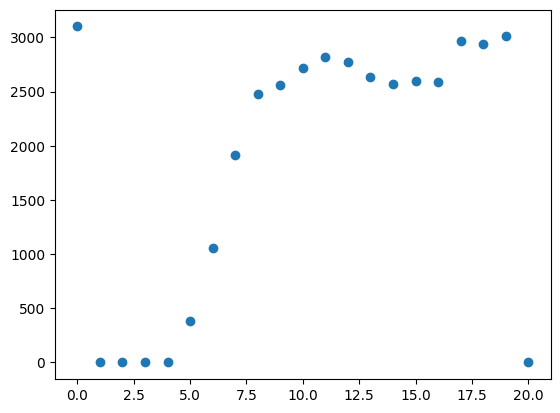

In [9]:
plt.plot(array_zreoure, "o")

      SNR  M1  M2      TIME  \
0  15.807  19  27  0.223023   
1  10.800  29  20  0.797190   
2  16.415  19  18  0.220284   
3  11.415  30  29  0.211155   
4  18.933  29  26  0.801241   

                                                Path  ChirpMass  
0  /content/Continous_Check/Data/SNR=15.807100992...      19.66  
1  /content/Continous_Check/Data/SNR=10.800934063...      20.89  
2  /content/Continous_Check/Data/SNR=16.415678419...      16.10  
3  /content/Continous_Check/Data/SNR=11.415157174...      25.68  
4  /content/Continous_Check/Data/SNR=18.933540837...      23.90  


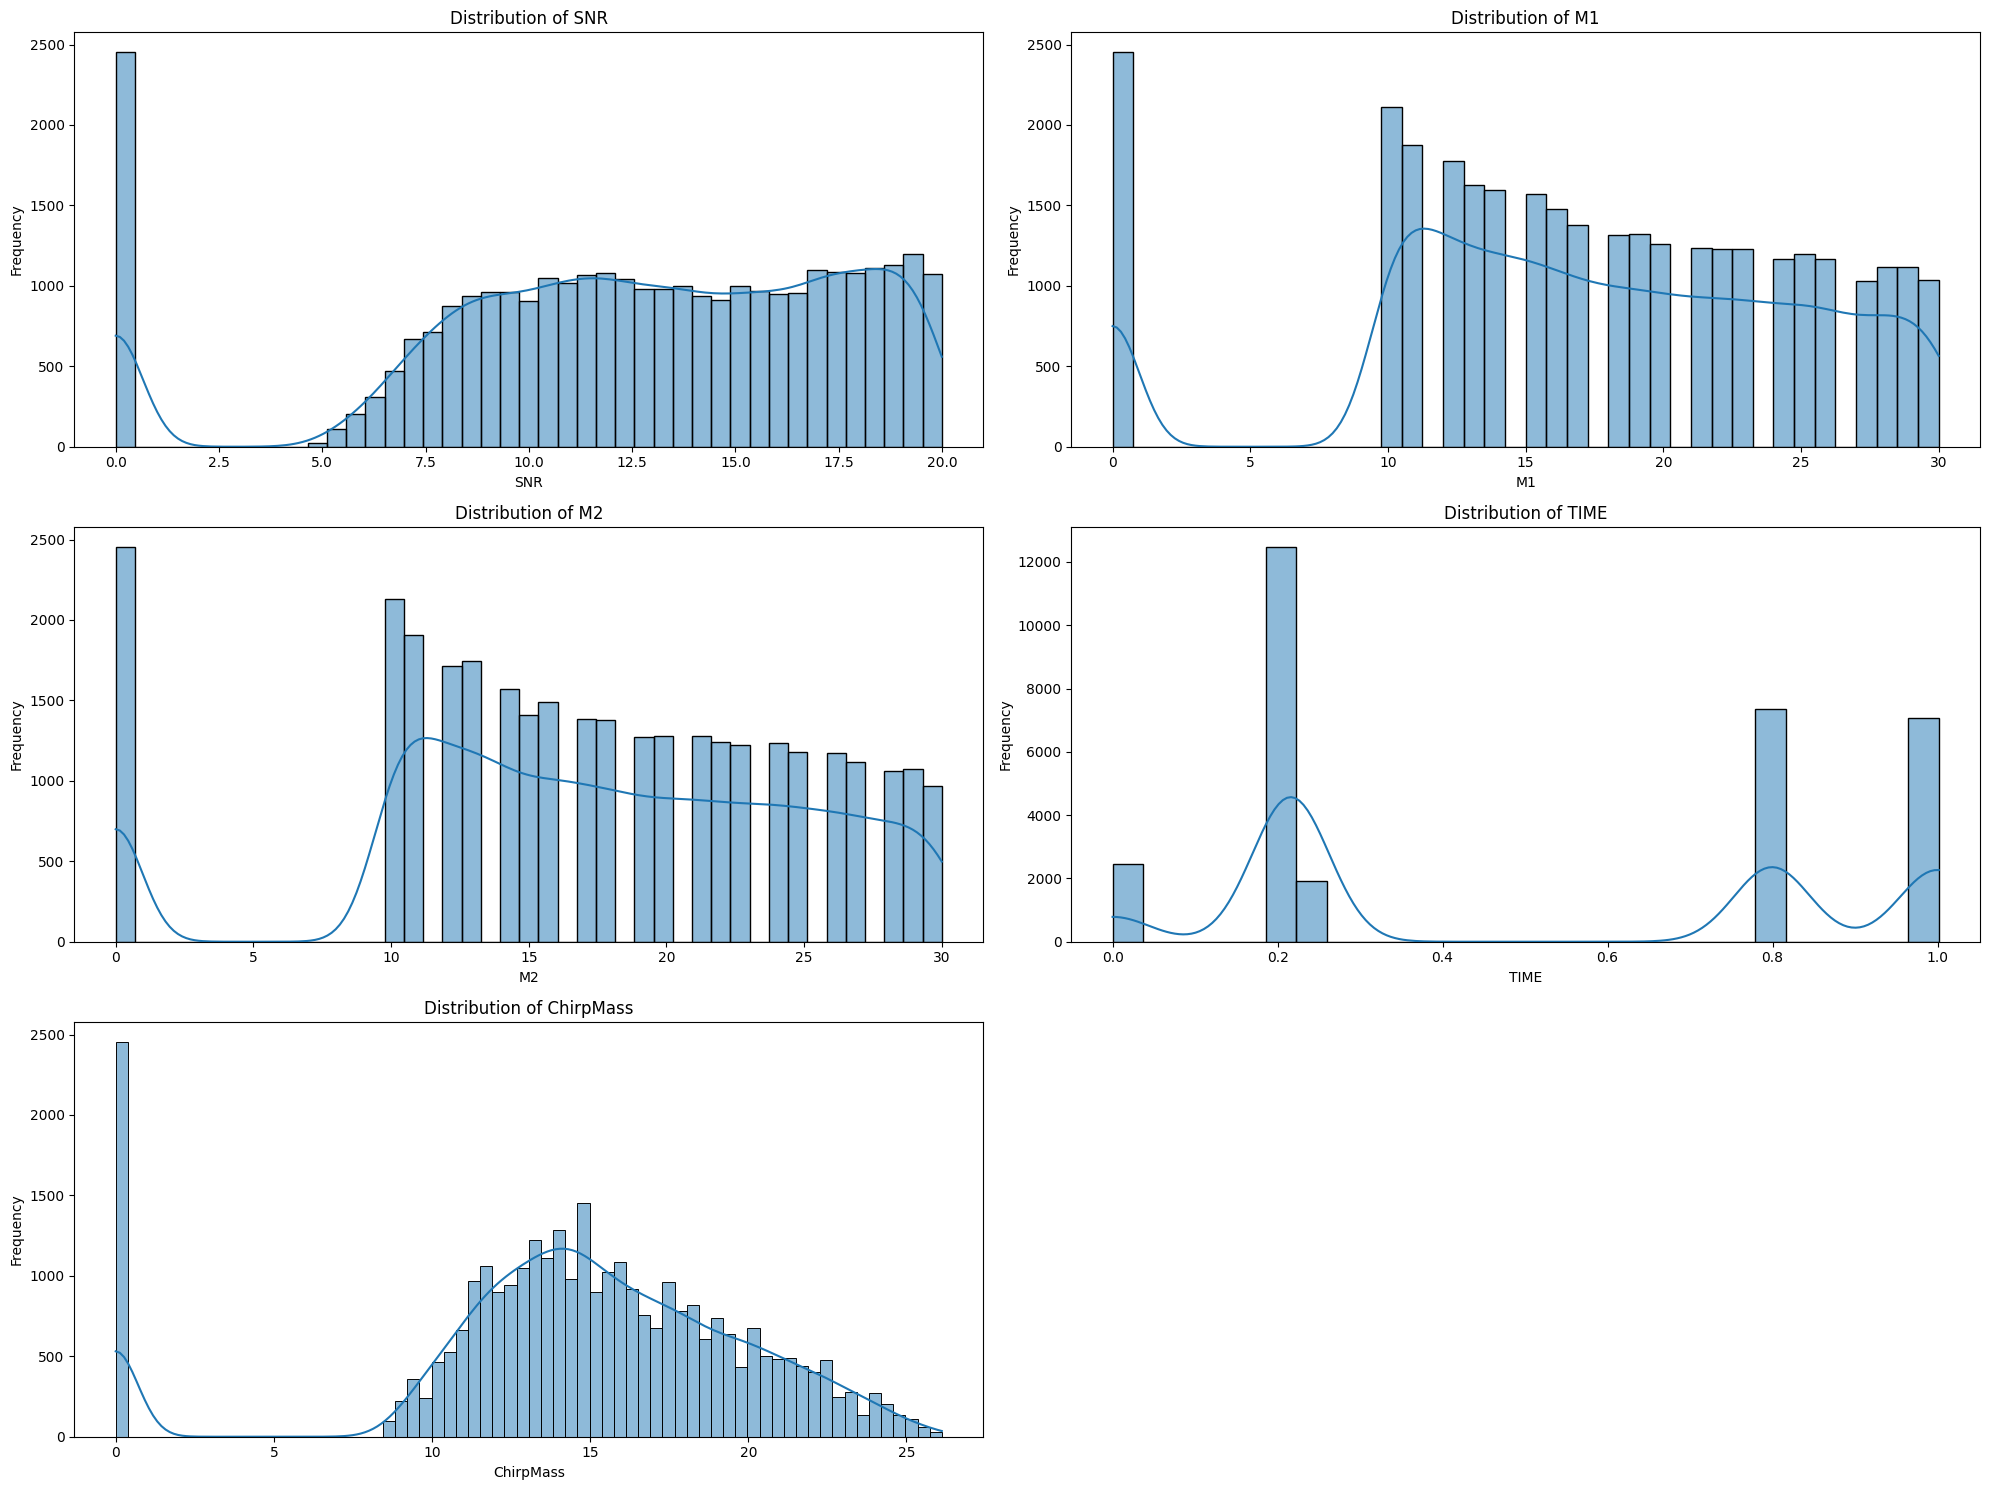

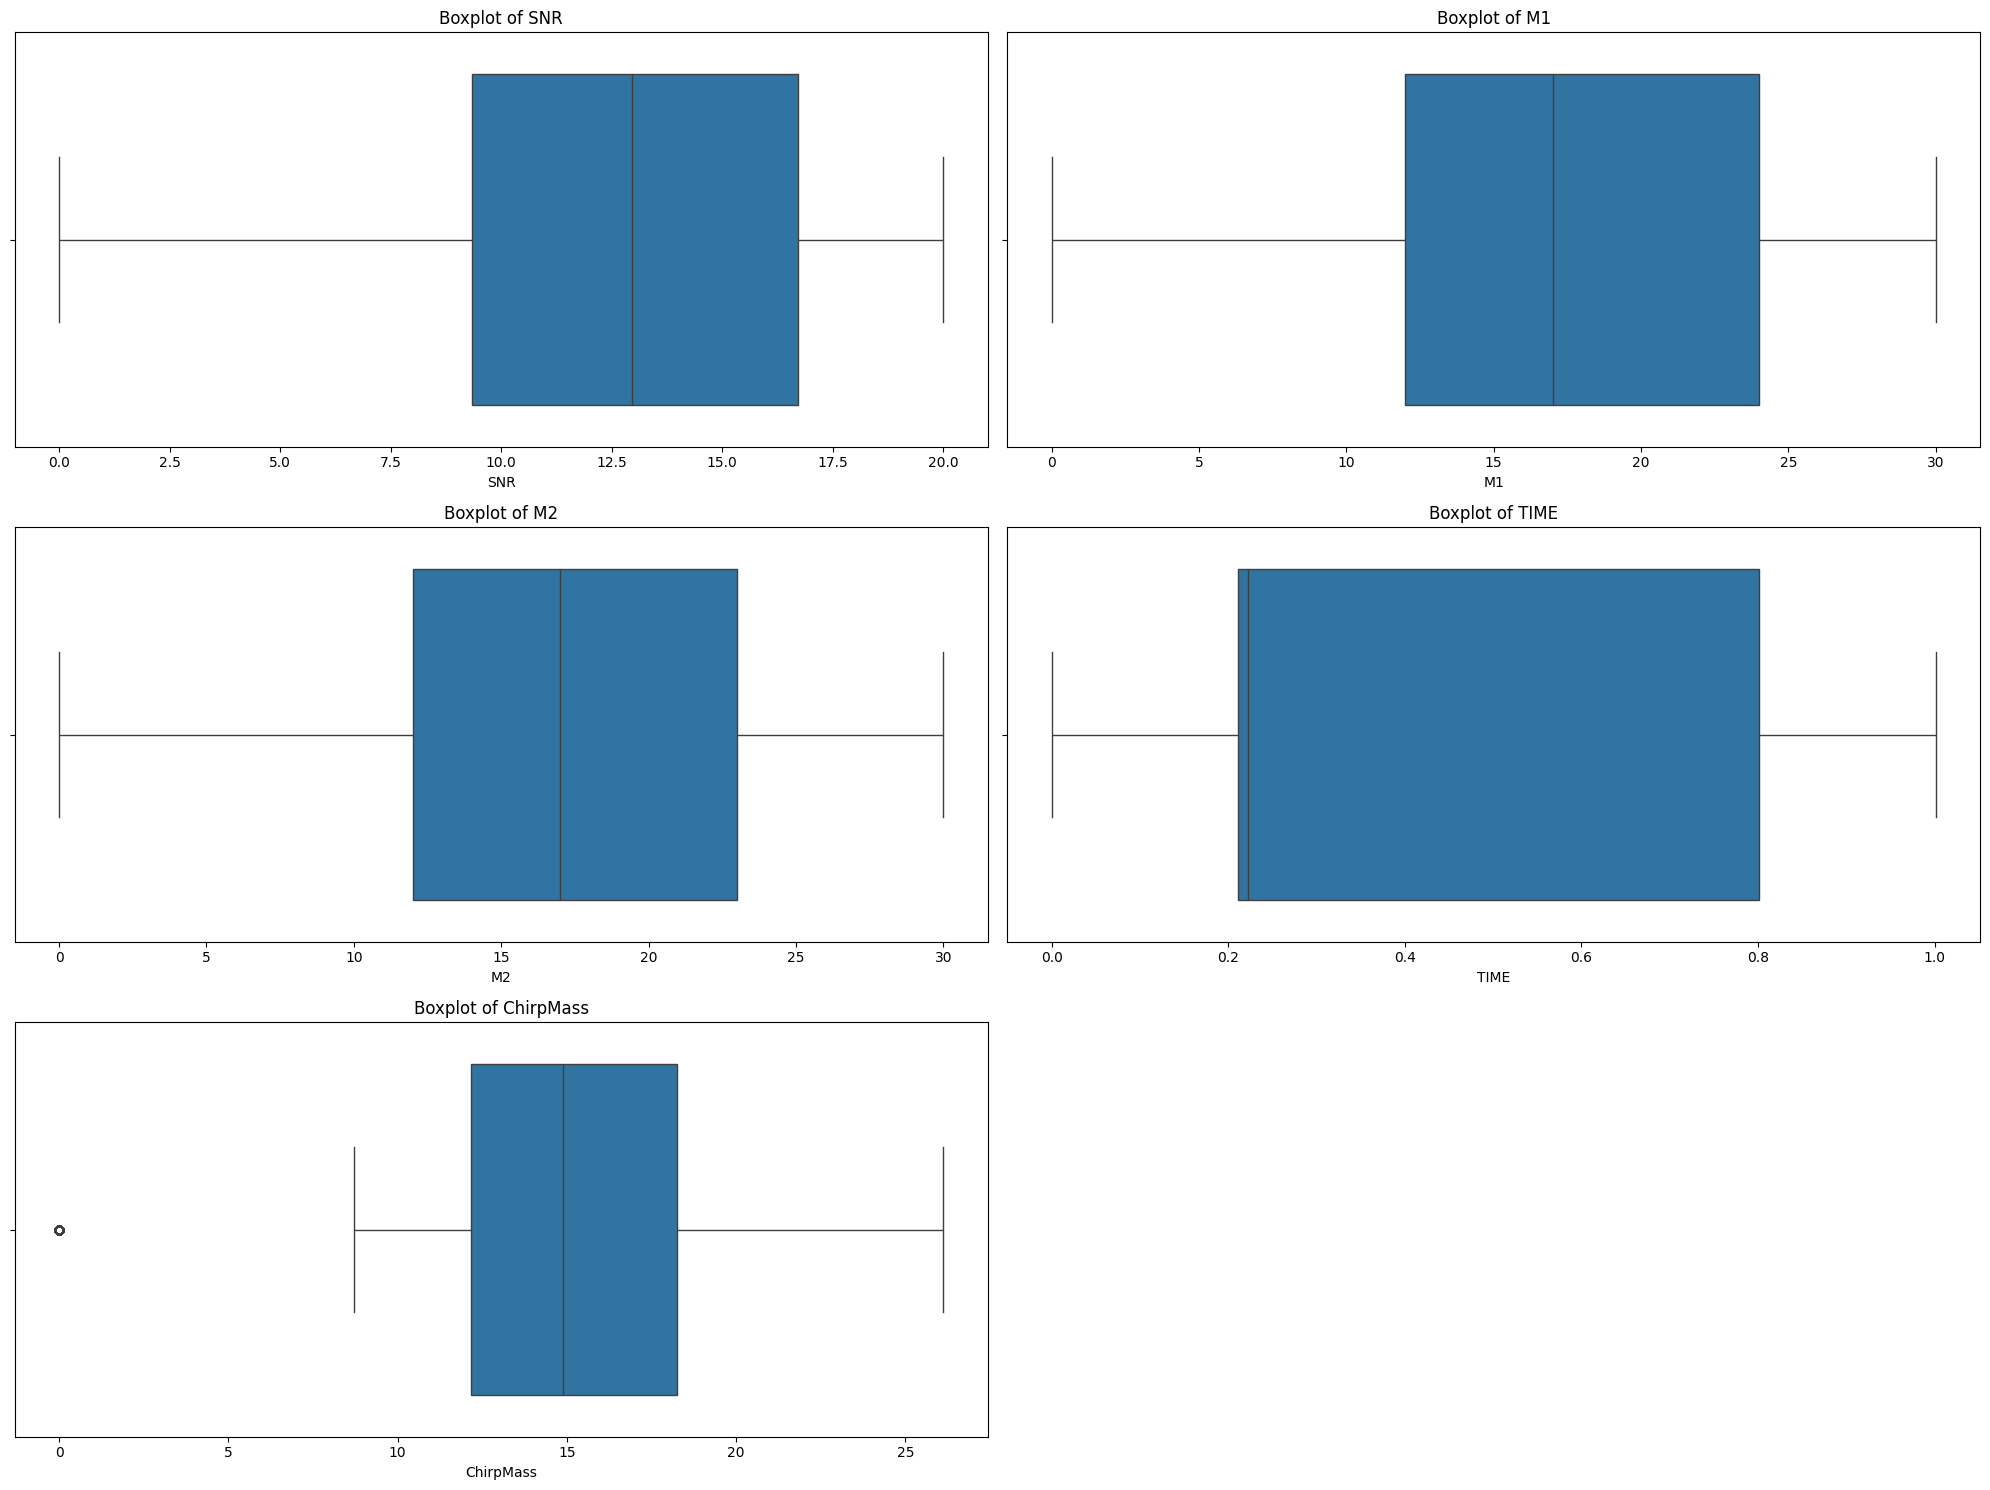

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv('D:\GW_Project_1\Data_Generation\Continous_Check\cont_data_train.csv')

# Display the first few rows of the dataframe to ensure it's loaded correctly
print(df.head())

# Plot the distribution of each parameter
parameters = ['SNR', 'M1', 'M2', 'TIME', 'ChirpMass']

plt.figure(figsize=(20, 15))

for i, param in enumerate(parameters):
    plt.subplot(3, 2, i+1)
    sns.histplot(df[param], kde=True)
    plt.title(f'Distribution of {param}')
    plt.xlabel(param)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Plot boxplots to check for outliers
plt.figure(figsize=(20, 15))

for i, param in enumerate(parameters):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=df[param])
    plt.title(f'Boxplot of {param}')
    plt.xlabel(param)

plt.tight_layout()
plt.show()
